# Telco Churn

This example uses the Telco Churn dataset to predict which Telco user is likely to churn; that is, customers that will likely stop using Telco. You can download the Jupyter Notebook of the study <a href="churn.ipynb">here</a>.

<ul class="ul_content">    
    <li>Churn - customers that left within the last month</li>
    <li>Services - services of each customer (phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies)</li>
    <li>Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
    <li>Customer demographics - gender, age range, and if they have partners and dependents</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

'0.9.0'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="../../connection.php">connection tutorial</a>.

In [2]:
vp.connect("VerticaDSN")

Let's create a Virtual DataFrame of the dataset. The dataset is available <a href="../../data/churn.csv">here</a>.

,AbccustomerIDVarchar(20),AbcgenderVarchar(20),123SeniorCitizenInt,010PartnerBoolean,010DependentsBoolean,123tenureInt,010PhoneServiceBoolean,AbcMultipleLinesVarchar(100),AbcInternetServiceVarchar(22),AbcOnlineSecurityVarchar(38),AbcOnlineBackupVarchar(38),AbcDeviceProtectionVarchar(38),AbcTechSupportVarchar(38),AbcStreamingTVVarchar(38),AbcStreamingMoviesVarchar(38),AbcContractVarchar(28),010PaperlessBillingBoolean,AbcPaymentMethodVarchar(50),"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",010ChurnBoolean
1,0002-ORFBO,Female,0,✅,✅,9,✅,No,DSL,No,Yes,No,Yes,Yes,No,One year,✅,Mailed check,65.6,593.3,❌
2,0003-MKNFE,Male,0,❌,❌,9,✅,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,❌,Mailed check,59.9,542.4,❌
3,0004-TLHLJ,Male,0,❌,❌,4,✅,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,✅,Electronic check,73.9,280.85,✅
4,0011-IGKFF,Male,1,✅,❌,13,✅,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,✅,Electronic check,98.0,1237.85,✅
5,0013-EXCHZ,Female,1,✅,❌,3,✅,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,✅,Mailed check,83.9,267.4,✅
6,0013-MHZWF,Female,0,❌,✅,9,✅,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,✅,Credit card (automatic),69.4,571.45,❌
7,0013-SMEOE,Female,1,✅,❌,71,✅,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,✅,Bank transfer (automatic),109.7,7904.25,❌
8,0014-BMAQU,Male,0,✅,❌,63,✅,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,✅,Credit card (automatic),84.65,5377.8,❌
9,0015-UOCOJ,Female,1,❌,❌,7,✅,No,DSL,Yes,No,No,No,No,No,Month-to-month,✅,Electronic check,48.2,340.35,❌
10,0016-QLJIS,Female,0,✅,✅,65,✅,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,✅,Mailed check,90.45,5957.9,❌

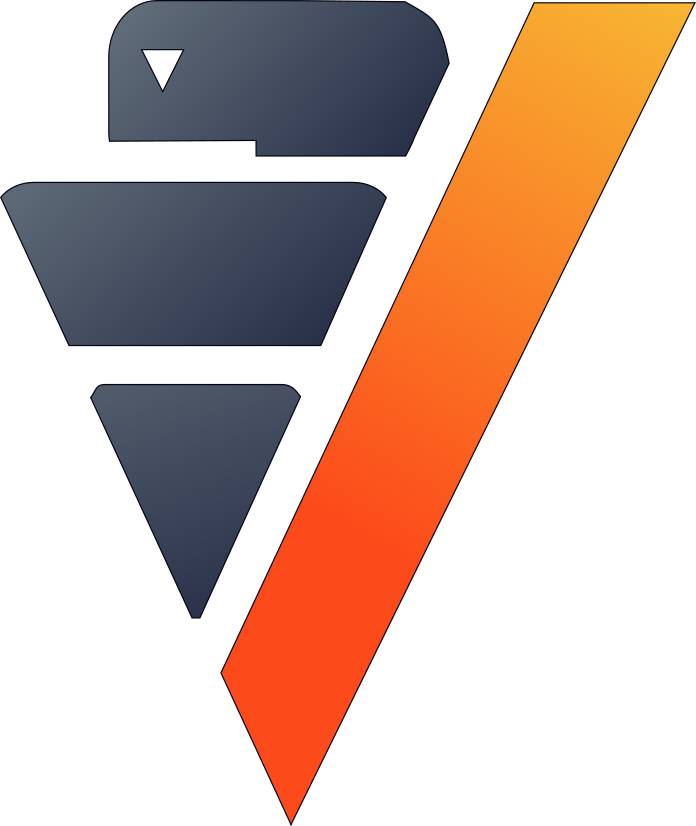

In [3]:
churn = vp.read_csv('data/churn.csv')
display(churn)

## Data Exploration and Preparation

Let's examine our data.

,dtype,count,top,top_percent,unique
"""customerID""",varchar(20),7043,0002-ORFBO,0.014,7043.0
"""gender""",varchar(20),7043,Male,50.476,2.0
"""SeniorCitizen""",int,7043,0,83.785,2.0
"""Partner""",boolean,7043,0,51.697,2.0
"""Dependents""",boolean,7043,0,70.041,2.0
"""tenure""",int,7043,1,8.704,73.0
"""PhoneService""",boolean,7043,1,90.317,2.0
"""MultipleLines""",varchar(100),7043,No,48.133,3.0
"""InternetService""",varchar(22),7043,Fiber optic,43.959,3.0
"""OnlineSecurity""",varchar(38),7043,No,49.666,3.0

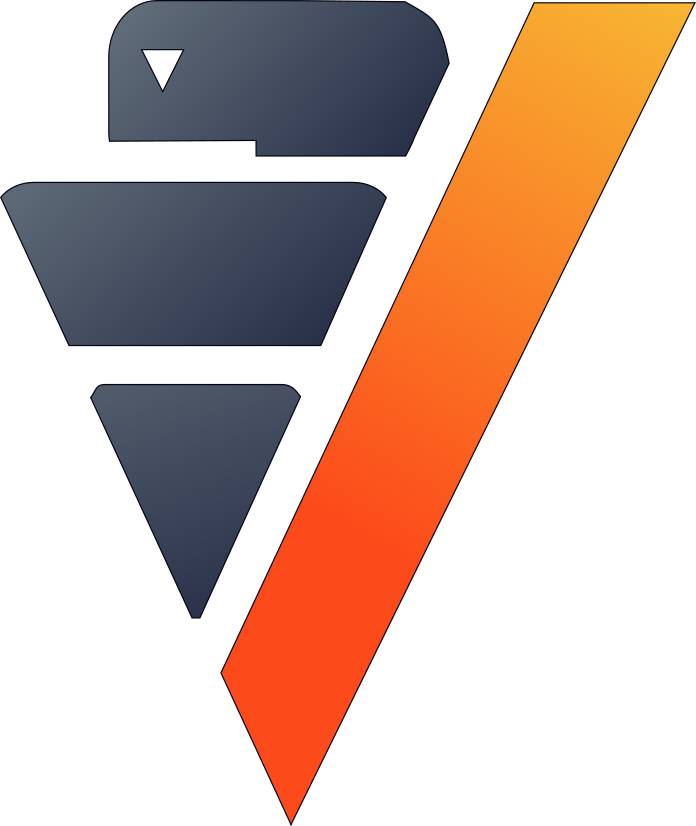

In [6]:
churn.describe(method = "categorical", unique = True)

Several variables are categorical, and since they all have low cardinalities, we can compute their dummies. We can also convert all booleans to numeric.

,123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool
1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,1,1,0,0,1,,,0
2,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,0,1,0,1,0,,,0
3,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,0,0,1,1,0,,,1
4,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,0,0,1,1,0,,,1
5,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,1,0,1,1,0,,,0
6,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,1,1,0,1,0,,,0
7,1,1,0,71,1,0,1,1,1,1,1,1,1,109.7,7904.25,0,1,0,1,0,0,,,0
8,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0
9,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,1,1,0,1,0,,,1
10,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.9,0,1,1,0,0,0,,,0

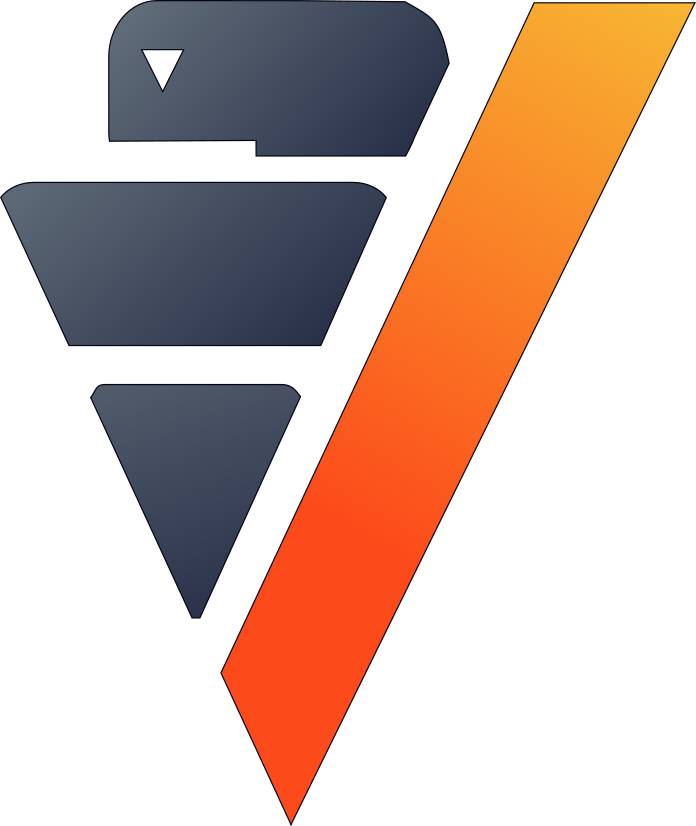

In [7]:
for column in ["DeviceProtection", 
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes", 1, 0)
churn.one_hot_encode().drop(["customerID", 
                             "gender", 
                             "Contract", 
                             "PaymentMethod", 
                             "InternetService"])

Let's compute the correlations between the different variables and the response column.

,"""Churn"""
,1.0
,0.405
,-0.352
,0.308
,0.302
,-0.199
,0.193
,0.192
,-0.178
,-0.171

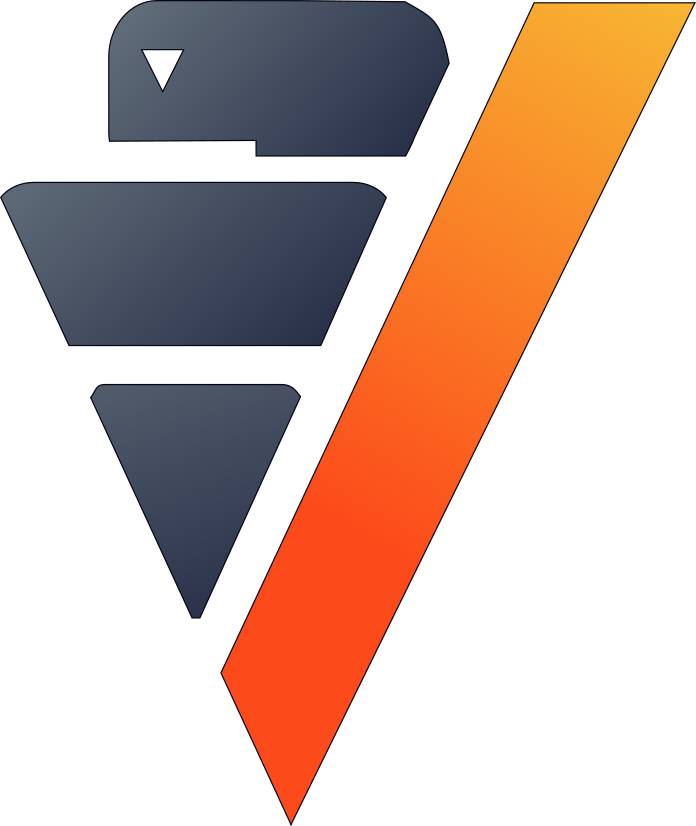

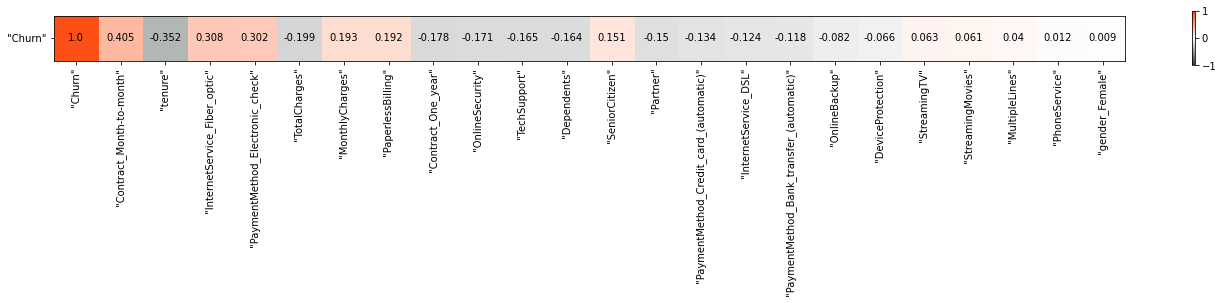

In [8]:
%matplotlib inline
churn.corr(focus = "Churn")

Many features have a strong correlation with the 'Churn' variable. For example, the customers that have a 'Month to Month' contract are more likely to churn. Having this type of contract gives customers a lot of flexibility and allows them to leave at any time. New customers are also likely to churn.

<AxesSubplot:xlabel='"Contract_Month-to-month"', ylabel='avg("Churn")'>

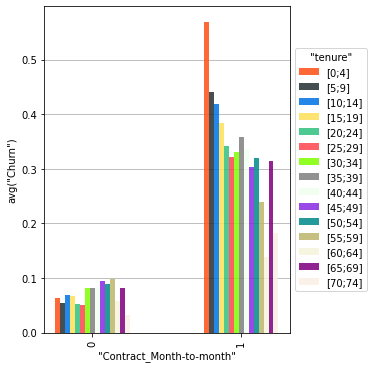

In [9]:
# No lock-in = Churn
churn.hist(["Contract_Month-to-month", "tenure"], method = "avg", of = "Churn")

The following scatter plot shows that providing better tariff plans can prevent churning. Indeed, customers having high total charges are more likely to churn even if they've been with the company for a long time.

<AxesSubplot:xlabel='"TotalCharges"', ylabel='"tenure"'>

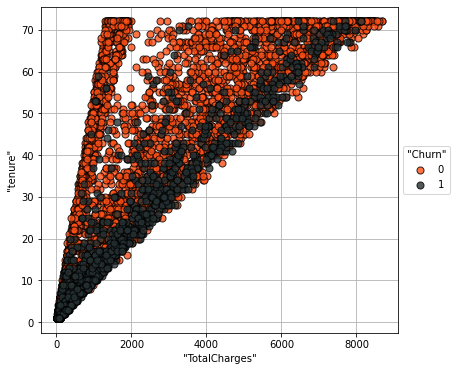

In [10]:
churn.scatter(["TotalCharges", "tenure"], catcol = "Churn")

Let's move on to machine learning.

## Machine Learning

Logistic regression is a very powerful algorithm and we can use it to detect churns. Let's split our vDataFrame into training and testing set to evaluate our model.

In [11]:
train, test = churn.train_test_split(test_size = 0.2, 
                                     random_state = 0)

Let's train and evaluate our model.

,value
auc,0.8554368006422792
prc_auc,0.6822415600545241
accuracy,0.8031161473087819
log_loss,0.1717601946823
precision,0.6761006289308176
recall,0.5512820512820513
f1_score,0.6073446327683616
mcc,0.48220268504473107
informedness,0.45049927241708065
markedness,0.5161371920021156

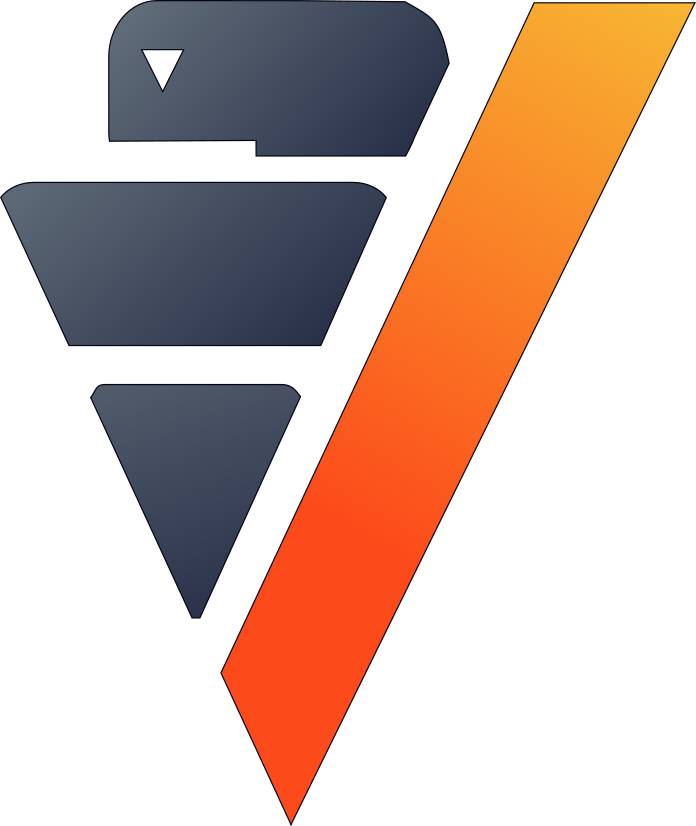

In [12]:
from verticapy.learn.linear_model import LogisticRegression
model = LogisticRegression("churn_model", 
                           penalty = 'L2', 
                           tol = 1e-6, 
                           max_iter = 1000, 
                           solver = "BFGS")
model.fit(train, 
          churn.get_columns(exclude_columns = ["churn"]), 
          'churn',
          test)
model.classification_report()

The model is excellent! Let's run some machine learning on the entire dataset and compute the importance of each feature.

,importance,sign
,28.58,-1
,18.43,1
,8.66,1
,7.0,1
,5.79,1
,5.26,-1
,4.31,1
,3.58,1
,2.93,-1
,2.81,-1

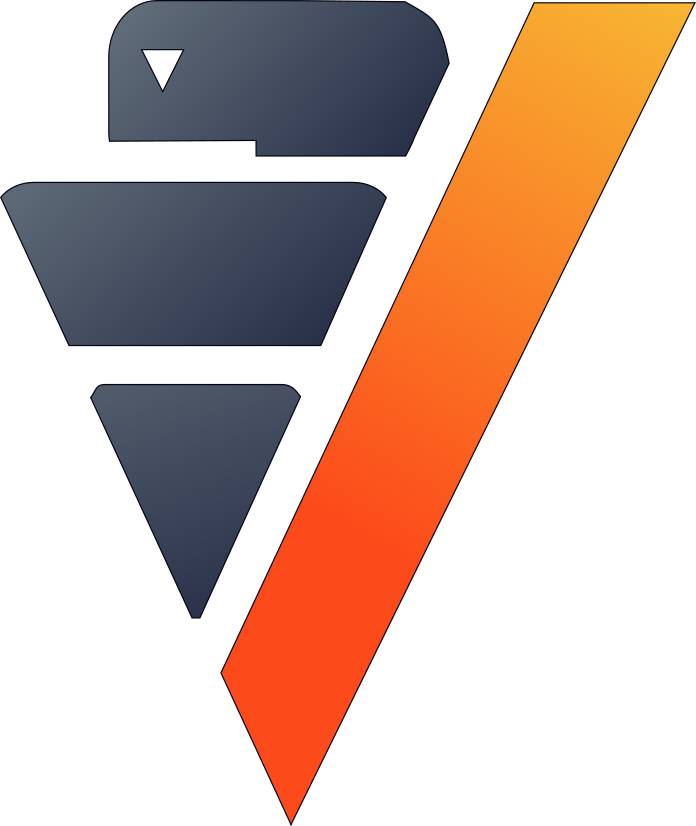

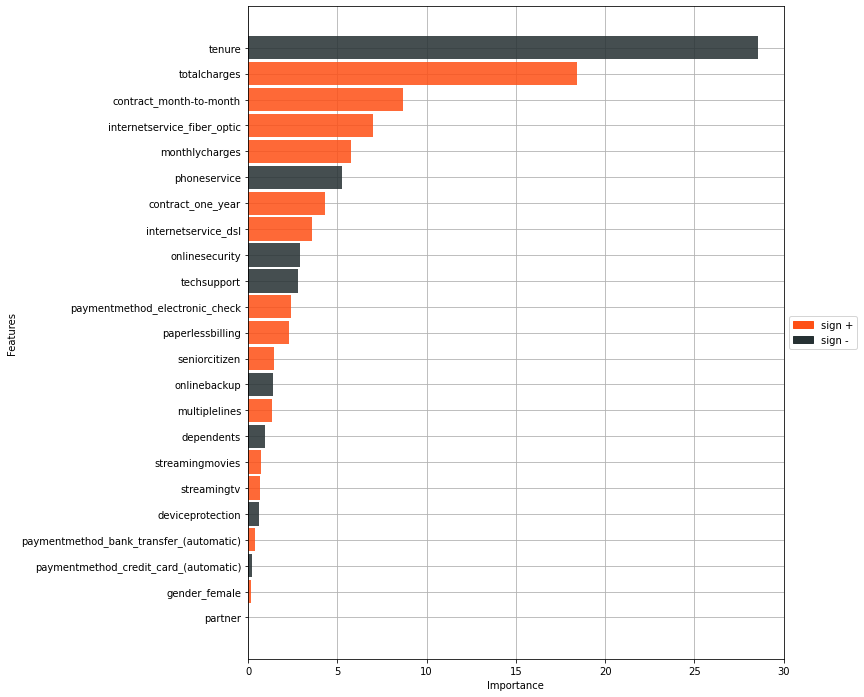

In [13]:
model.fit(churn, 
          churn.get_columns(exclude_columns = ["churn"]), 
          'churn')
model.features_importance()

Based on our model, most churning customers are at least one of the following:
<ul>
 <li>Paying higher bills</li>
 <li>New Telco customers</li>
 <li>Have a monthly contract</li>
</ul>

Notice that customers have a 'Fiber Optic' option are also likely to churn. Let's check if this relationship is causal by computing some aggregations.

,123InternetService_Fiber_opticInteger,123tenureFloat,123totalchargesFloat,123contract_month_to_monthFloat,123monthlychargesFloat
1,0,31.9422346085635,1558.06548526423,0.442614644033443,43.7882442361287
2,1,32.9179586563307,3205.30457041344,0.68733850129199,91.5001291989664

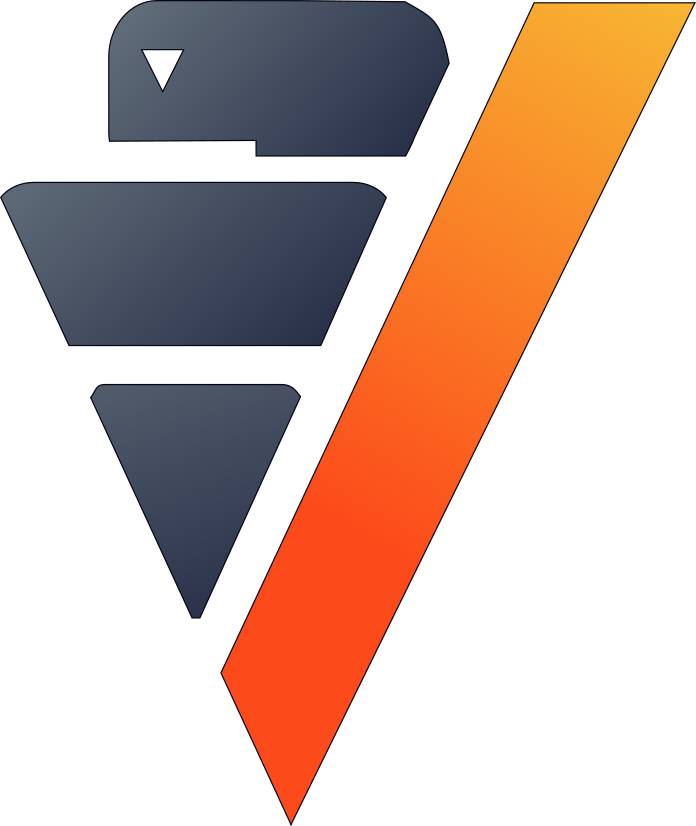

In [15]:
import verticapy.stats as st
# Is Fiber optic a Bad Option? - VerticaPy
churn.groupby(["InternetService_Fiber_optic"], 
              [st.avg(churn["tenure"])._as("tenure"),
               st.avg(churn["totalcharges"])._as("totalcharges"),
               st.avg(churn["contract_month-to-month"])._as("contract_month_to_month"),
               st.avg(churn["monthlycharges"])._as("monthlycharges")])

It seems like the 'Fiber Optic' option in and of itself doesn't lead to churning, but customers that have this option tend to churn because their contract puts them into one of the three categories we listed before: they're paying more.

To retain these customers, we'll need to make some changes to what types of contracts we offer.

We'll use a lift chart to help us identify which of our customers are likely to churn.

,decision_boundary,positive_prediction_ratio,lift
1,0.0,0.0,3.76243980738363
2,0.001,0.0,3.76243980738363
3,0.002,0.0,3.76243980738363
4,0.003,0.0,3.76243980738363
5,0.004,0.0,3.76243980738363
6,0.005,0.0,3.76243980738363
7,0.006,0.0,3.76243980738363
8,0.007,0.0,3.76243980738363
9,0.008,0.0,3.76243980738363
10,0.009,0.0,3.76243980738363

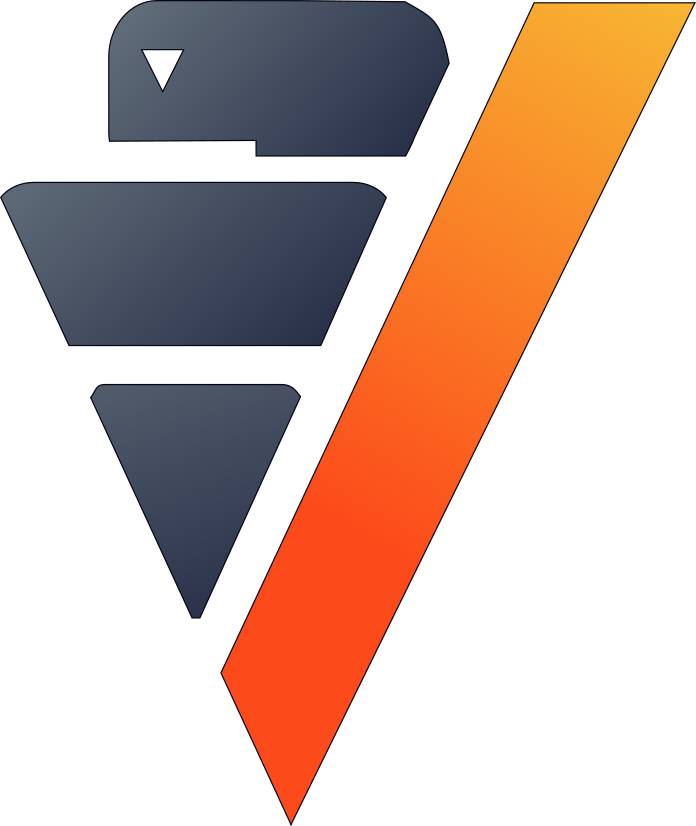

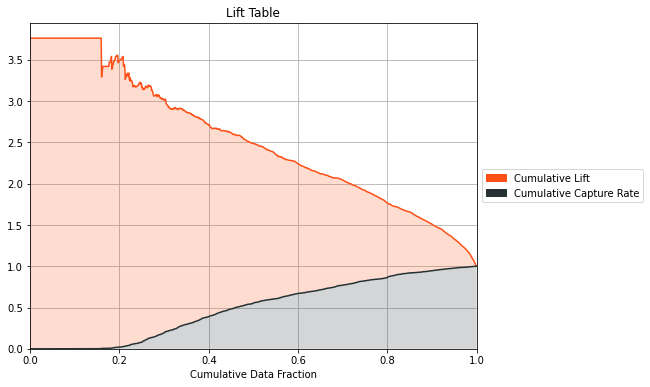

In [16]:
model.lift_chart()

By targeting less than 30% of the entire distribution, our predictions will be more than three times more accurate than the other 70%.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!